<a href="https://colab.research.google.com/github/Kshitija0707/File-Manipulation-/blob/main/SPEECH_RECOGNITION_ENGINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Archive:  toronto-emotional-speech-set-tess.zip
replace TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **IMPORT MODULES**

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
from IPython.display import Audio
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_vote_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_boat_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_shout_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_kite_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_bone_neutral.wav']

In [ ]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral


In [ ]:
df['label'].value_counts()

,count
label,
ps,400
fear,400
happy,400
sad,400
disgust,400
neutral,400
angry,400


<Axes: xlabel='count', ylabel='label'>

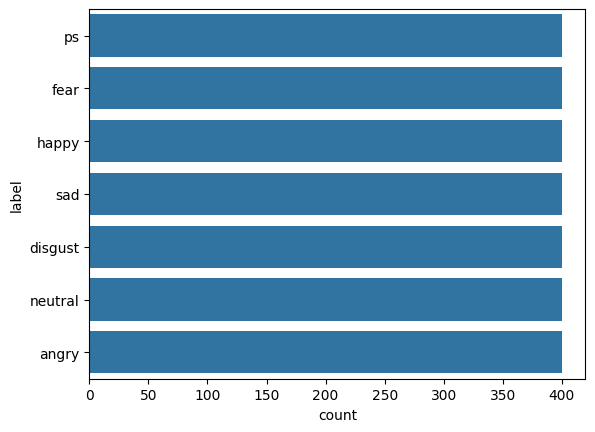

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [ ]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

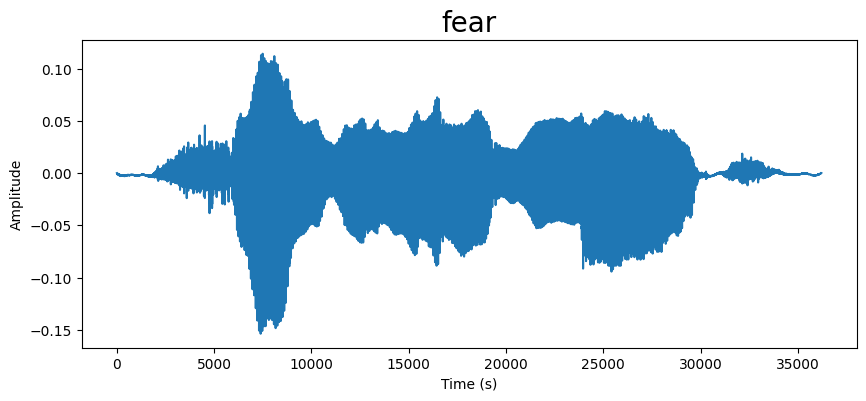

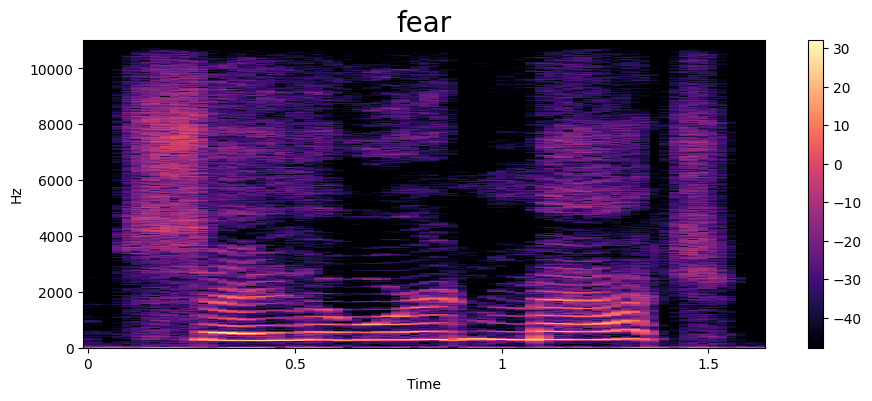

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

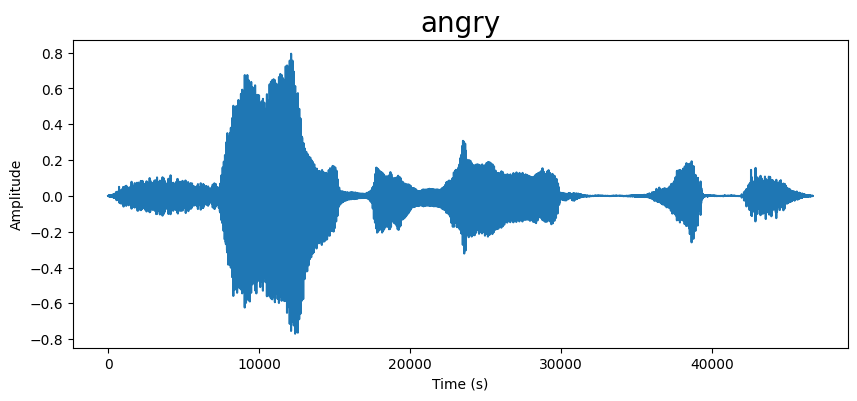

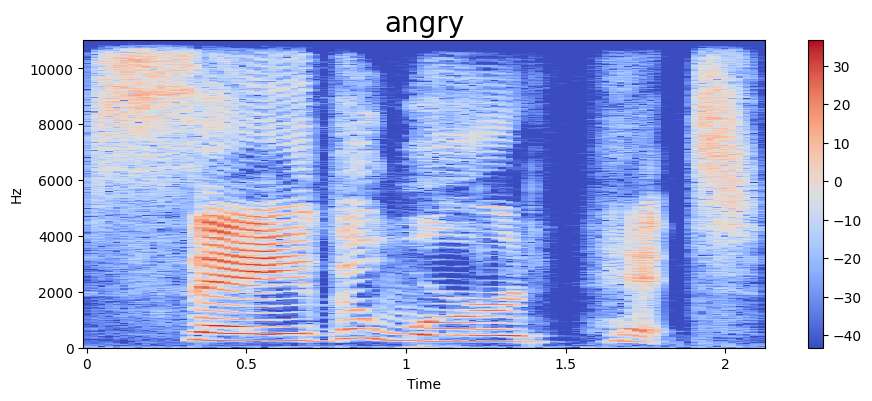

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

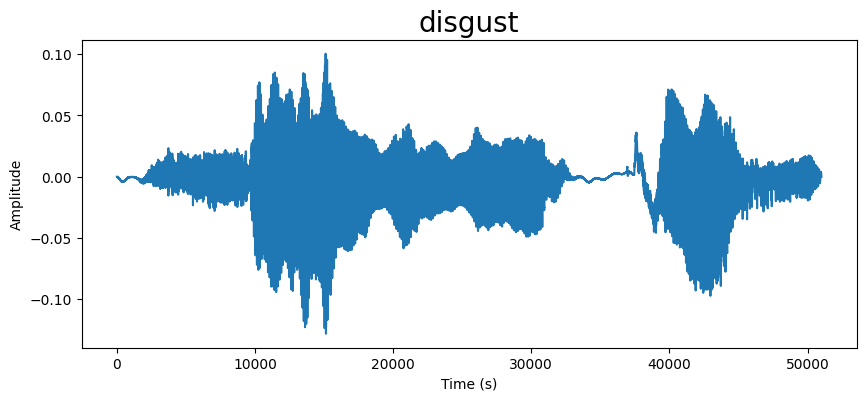

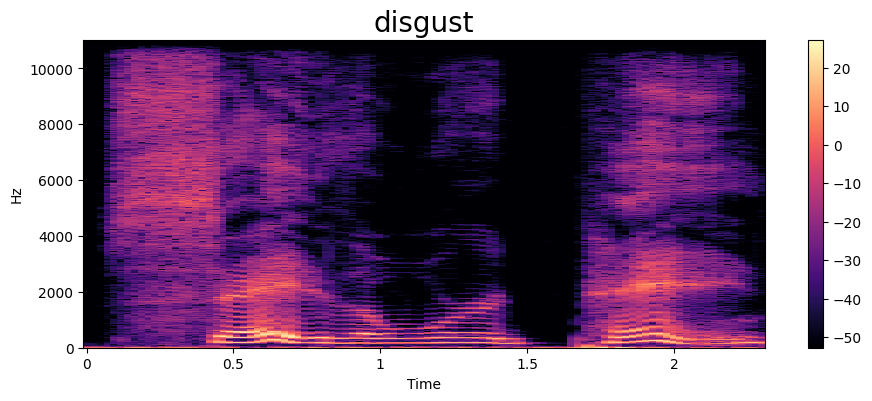

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

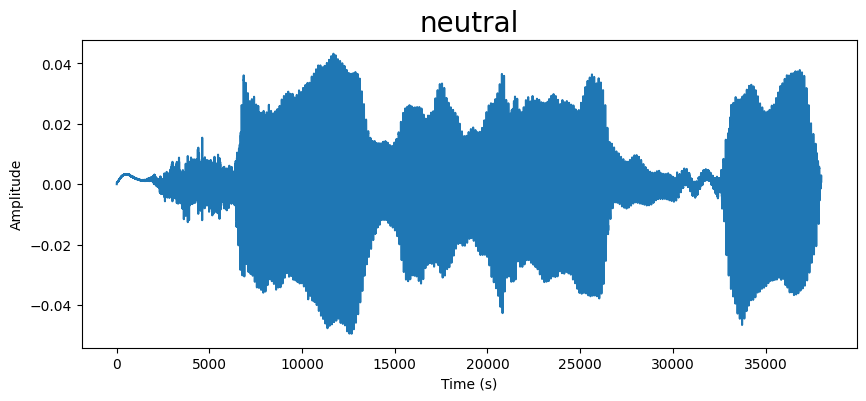

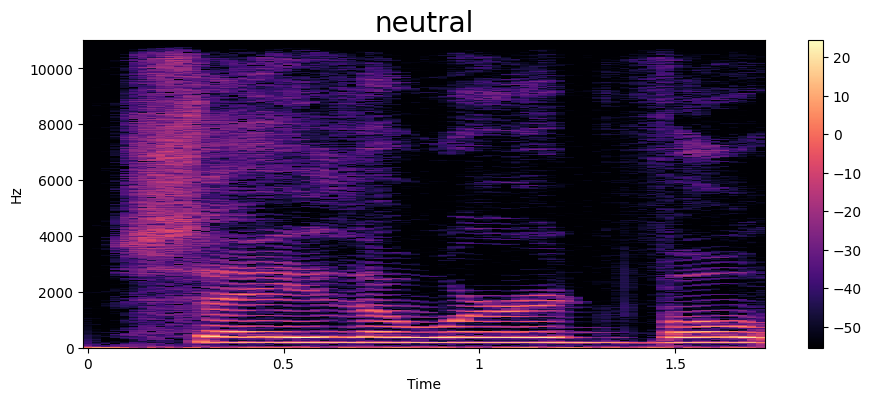

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

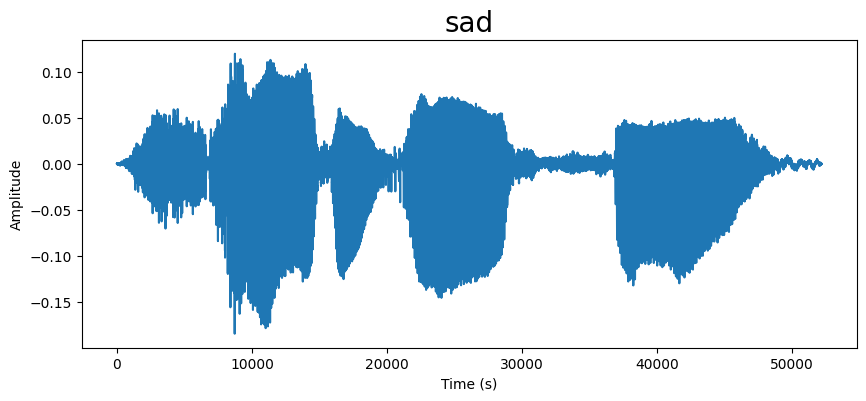

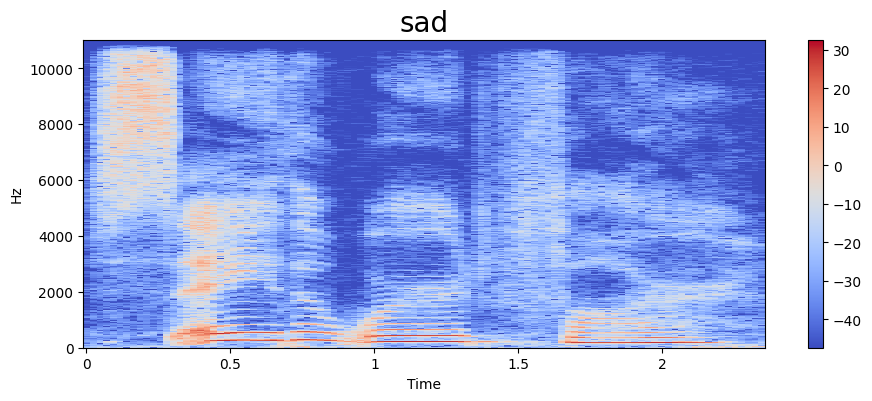

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

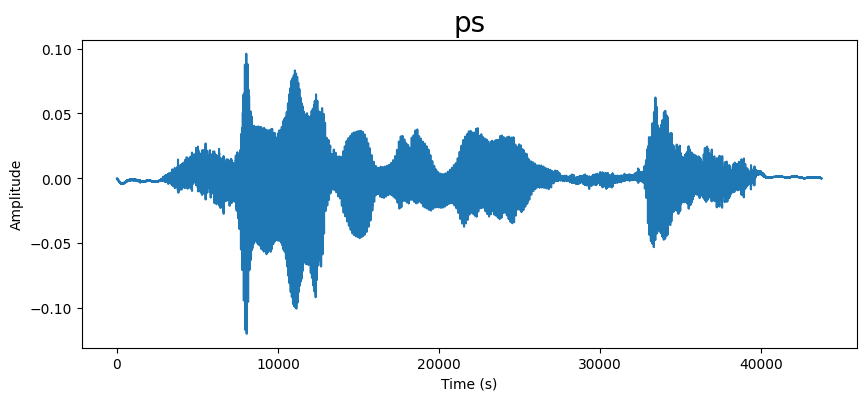

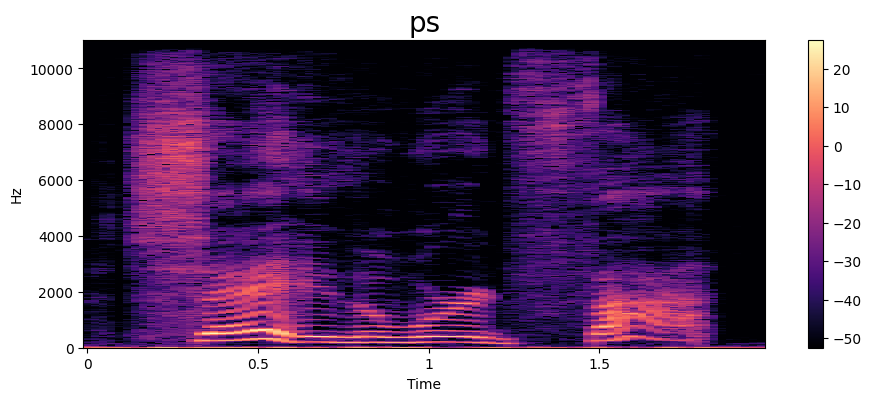

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

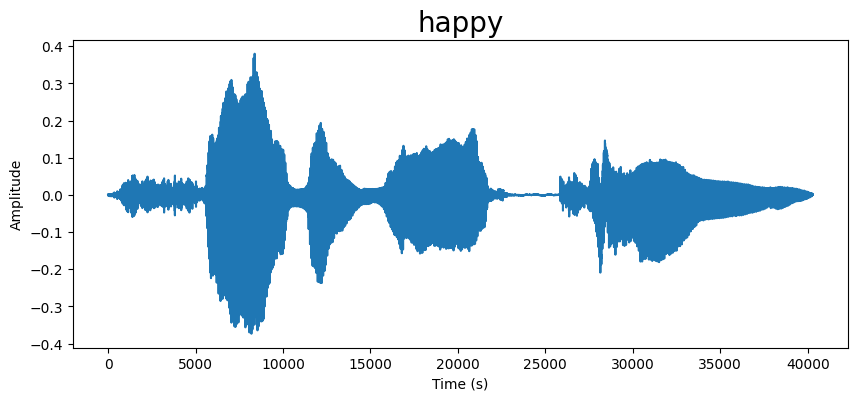

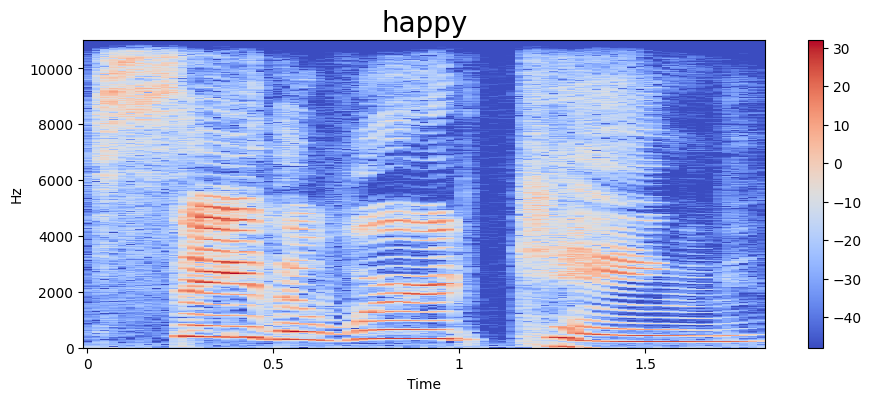

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-547.1428, 113.75922, 35.436787, -5.0645733, ..."
1,"[-533.6521, 112.14889, 36.682503, 3.1267436, 6..."
2,"[-481.6557, 80.43489, 14.06739, 3.7248943, 8.2..."
3,"[-505.0079, 97.62334, 13.907459, 3.4893417, 15..."
4,"[-553.5752, 106.701195, 35.995552, 8.247646, 8..."
...,...
2795,"[-298.43918, 55.540203, -15.294176, -3.9173093..."
2796,"[-254.47058, 57.12825, -39.79231, 6.764894, -6..."
2797,"[-333.81586, 40.91223, -19.692923, 13.061709, ..."
2798,"[-321.49887, 47.913506, -19.302774, 13.760705,..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

# **INPUT SPLIT**

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

y.shape


(2800, 7)

# **CREATING LSTM MODELS**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.6723 - loss: 0.8768 - val_accuracy: 0.8080 - val_loss: 0.4760
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.7823 - loss: 0.5872 - val_accuracy: 0.9107 - val_loss: 0.2341
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.8797 - loss: 0.3458 - val_accuracy: 0.8504 - val_loss: 0.4307
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9111 - loss: 0.2947 - val_accuracy: 0.9621 - val_loss: 0.1286
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.9530 - loss: 0.1588 - val_accuracy: 0.9442 - val_loss: 0.1627
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9503 - loss: 0.1610 - val_accuracy: 0.9353 - val_loss: 0.1955
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.9477 - loss: 0.1624 - val_accuracy: 0.9732 - val_loss: 0.0971
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.9743 - loss: 0.0830 - val_accuracy: 0.

# **PLOT THE RESULTS**

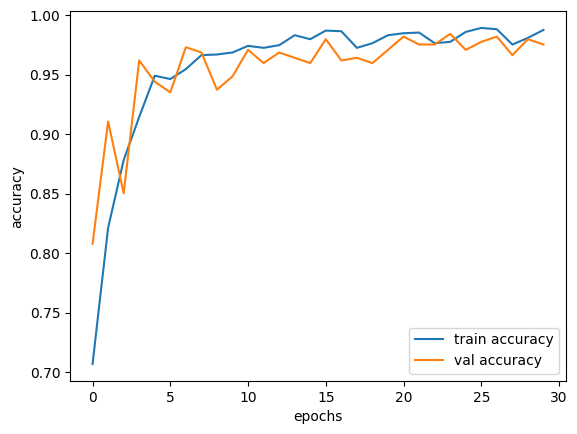

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

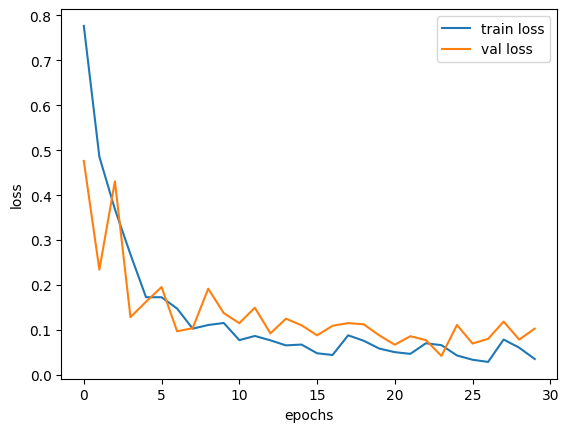

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()